In [1]:
from data_import import *
import matplotlib.pyplot as plt

# LOAD THE DATA AND SPLIT UP THINGS
X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy()

print(X_tr.shape)

(10212, 2500)


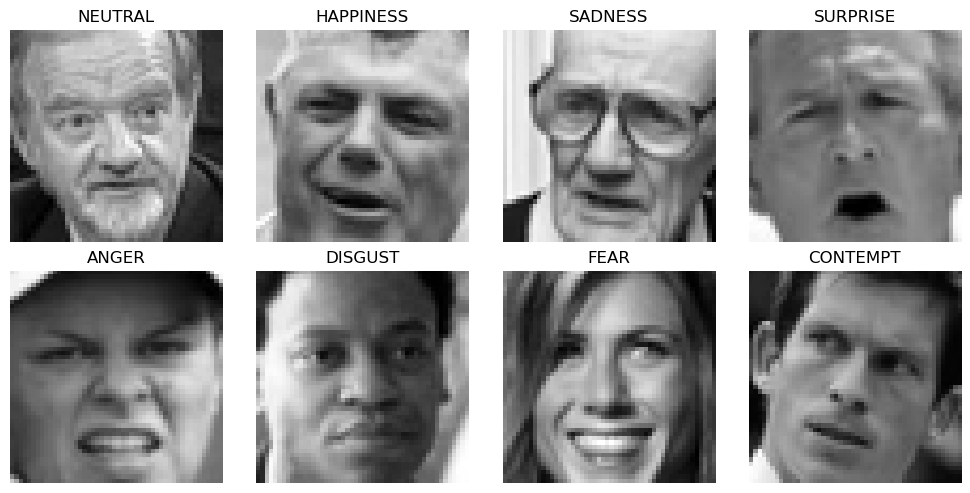

In [2]:
# Dictionary to store one sample per class
unique_samples = {}

# Collect one sample per class
for i in range(len(Y_tr)):
    label = classes[Y_tr[i]]  # Get the class name
    if label not in unique_samples:
        unique_samples[label] = (X_tr[i], filepaths[i])
        if len(unique_samples) == 8:  # Stop when we have 8 samples
            break

# Number of rows and columns
rows, cols = 2, 4

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each image
for ax, (label, (image, filepath)) in zip(axes, unique_samples.items()):
    ax.imshow(image.reshape(50, 50), cmap='gray')
    ax.set_title(label)
    ax.axis('off')  # Hide axes for clarity

# Hide any unused subplots
for ax in axes[len(unique_samples):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

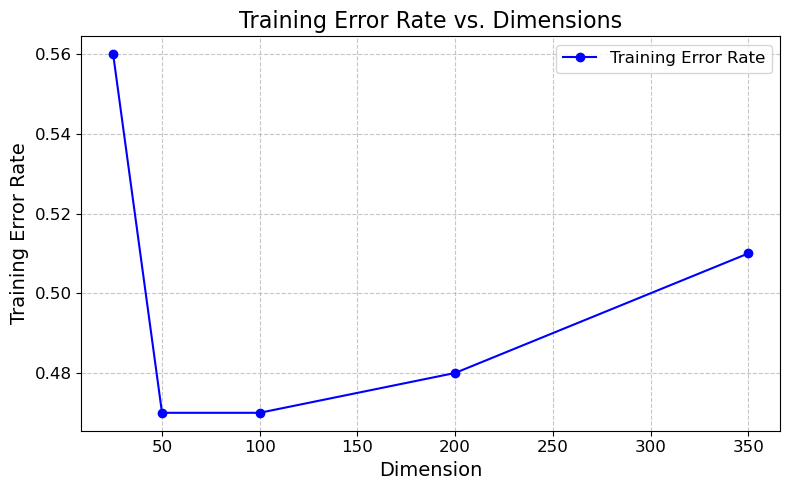

In [3]:
dimensions = [25, 50, 100, 200, 350]
err_rate = [0.56, 0.47, 0.47, 0.48, 0.51]

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the data
plt.plot(dimensions, err_rate, marker='o', linestyle='-', color='b', label='Training Error Rate')

# Customize the plot
plt.title('Training Error Rate vs. Dimensions', fontsize=16)
plt.xlabel('Dimension', fontsize=14)
plt.ylabel('Training Error Rate', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

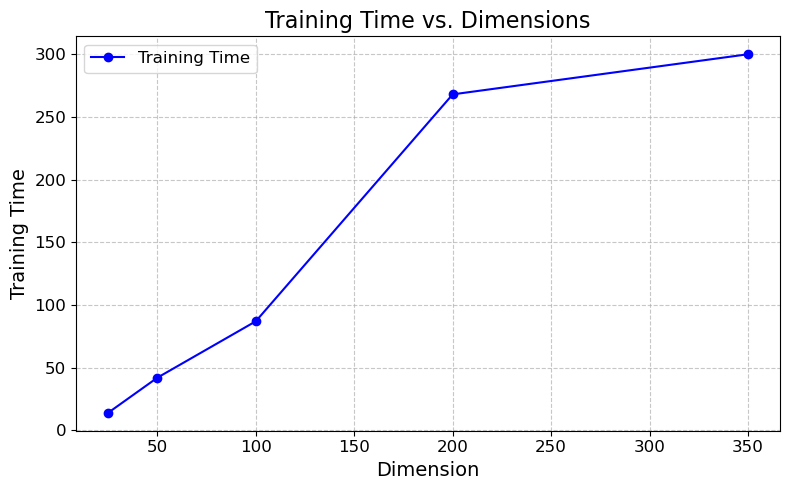

In [4]:
dimensions = [25, 50, 100, 200, 350]
training_time = [14, 42, 87, 268, 300]

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the data
plt.plot(dimensions, training_time, marker='o', linestyle='-', color='b', label='Training Time')

# Customize the plot
plt.title('Training Time vs. Dimensions', fontsize=16)
plt.xlabel('Dimension', fontsize=14)
plt.ylabel('Training Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# TRAIN MODEL TO GAUGE IDEAL PCA DIMENSIONS

errors = []

nn = MLPClassifier(
    hidden_layer_sizes=(128, 64), 
    activation='relu', 
    solver='adam', 
    max_iter=200
    )


nn.fit(X_tr, Y_tr)
error_curve_train = nn.loss_curve_

err = 1 - nn.score(X_val, Y_val)
print(f"Error: {err}")
# print(f"Predicted: {y_pred}   Actual: {Y_val}")